### Анализ данных взаимодействий с рекламными объявлениями

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

## Задачи
* Разберемся с распределением количества показов и кликов. 
Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).
* Нарисуйте график распределения показов на объявление за весь период.
* Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?
* Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 
Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 
* Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.
* Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))
* Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]
* А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

## Описание данных

ads_data.csv – данные взаимодействий с рекламными объявлениями

* date – дата
* time – время
* event – действие (просмотр/клик)
* platform – платформа
* ad_id – id объявления
* client_union_id – id рекламного кабинета
* campaign_union_id – id рекламной кампании
* ad_cost_type – тип оплаты
* ad_cost – цена
* has_video – есть ли видео
* target_audience_count – размер аудитории

ads_clients_data.csv – характеристики рекламных клиентов

* date – дата
* client_union_id – id рекламного кабинета
* community_id – id сообщества
* create_date – дата создания рекламного клиента

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import numpy as np

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
ads_data = pd.read_csv('C:\\Users\\ifedk\\JupyterNotebooks\\ads_data.csv',encoding='Windows-1251', sep=',')
ads_clients_data = pd.read_csv('C:\\Users\\ifedk\\JupyterNotebooks\\ads_clients_data.csv',encoding='Windows-1251', sep=',')

In [4]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [85]:
ads_clients_data = ads_clients_data.rename(columns = {'date':'clients_date'})
ads_clients_data

,clients_date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [6]:
#Первое задание 

#Посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.

average_df1 = ads_data.groupby(['ad_id','event'], as_index=False).agg({'ad_cost' : 'count'}).rename(columns={"ad_cost": "count"})
average_df1

,ad_id,event,count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [7]:
average_df = average_df1.pivot(index = 'ad_id', columns = 'event', values = 'count')
average_df = average_df.fillna(0)
average_df

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [8]:
average_df.mean().round(0)

event
click    113.0
view     923.0
dtype: float64

In [9]:
#Второе задание 

#Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения

view_visual_df = average_df1.query('event == "view"')
view_visual_df

,ad_id,event,count
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


C:\Users\ifedk\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

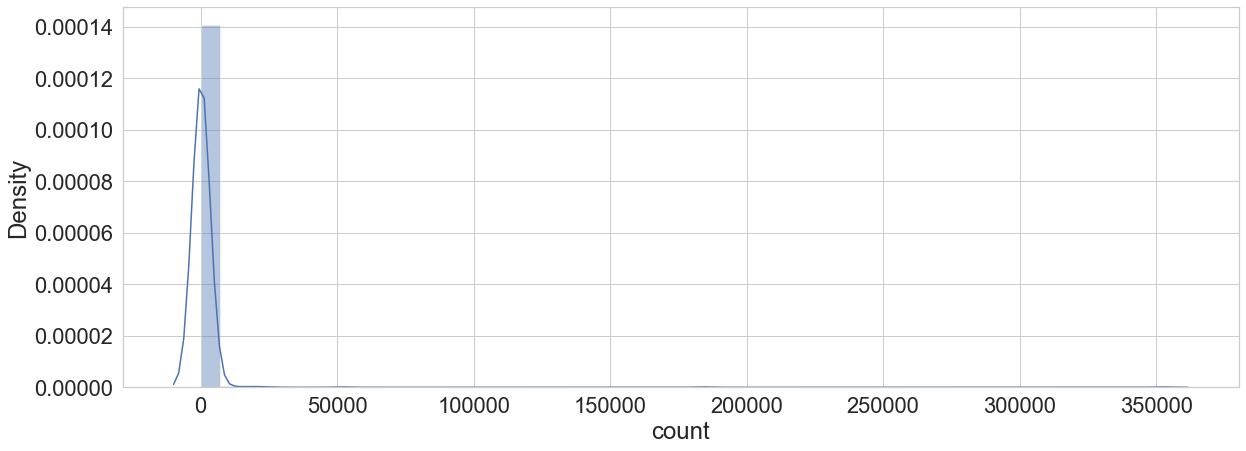

In [10]:
sns.distplot(view_visual_df['count'])

C:\Users\ifedk\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

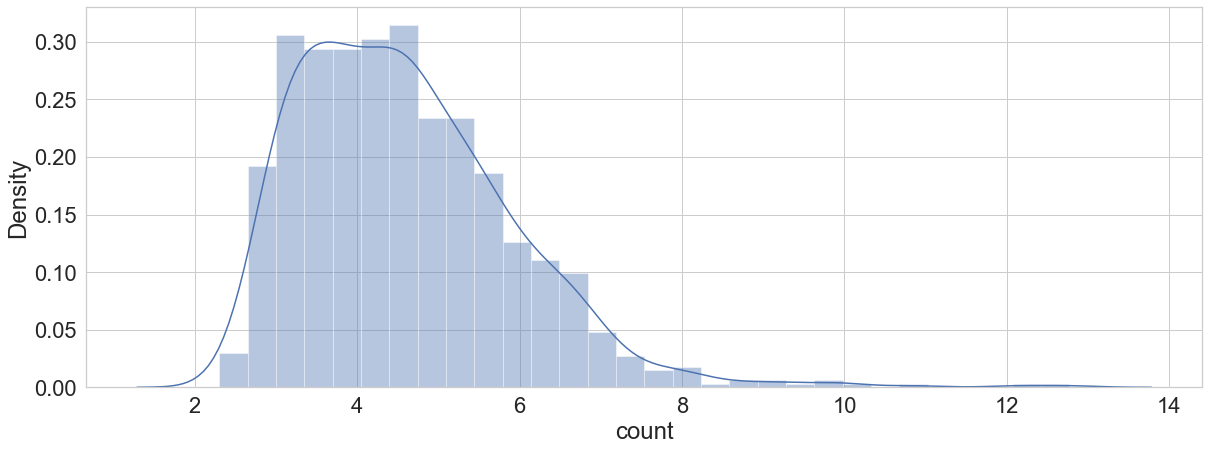

In [11]:
sns.distplot(np.log(view_visual_df['count']))

In [12]:
#Третье задание 

#Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.
#Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [13]:
average_by_dates = ads_data.query('event == "view"').groupby(['ad_id','date'],as_index=False).agg({'event':'count'})
average_by_dates

,ad_id,date,event
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [14]:
average_by_dates = average_by_dates.pivot(index = 'ad_id', columns = 'date', values = 'event')
average_by_dates

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [15]:
average_by_dates.mean()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [16]:
average_by_dates.mean().rolling(window=2).mean().round(0)

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [17]:
#Четвертое задание 

#Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).
#Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним

In [18]:
mean_view_df = average_by_dates.mean()
rolling_mean_view_df = average_by_dates.mean().rolling(window=2).mean().round(0)

<AxesSubplot:xlabel='date'>

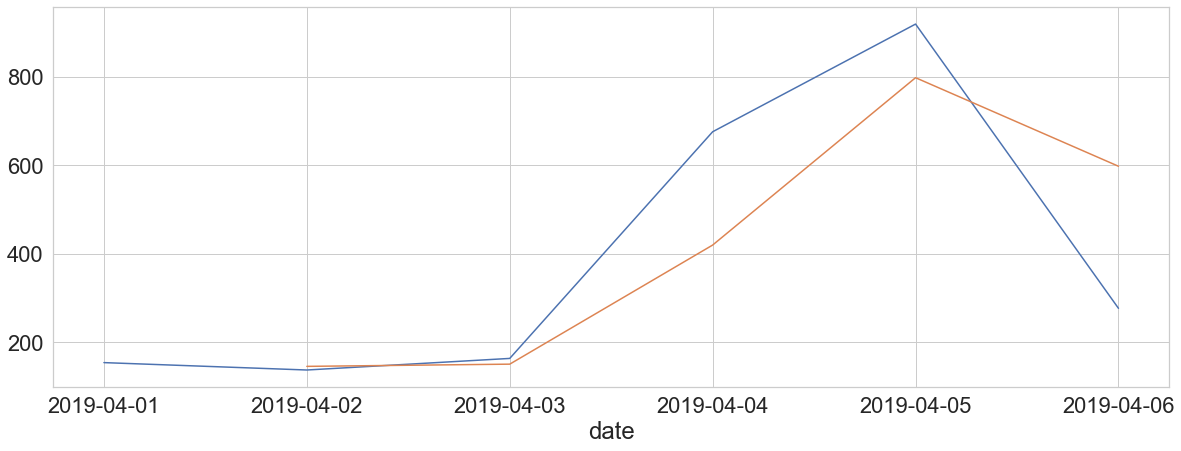

In [19]:
sns.lineplot(data=mean_view_df)
sns.lineplot(data=rolling_mean_view_df)

In [36]:
abs_difference = abs(mean_view_df - rolling_mean_view_df)
abs_difference

date
2019-04-01           NaN
2019-04-02      8.213018
2019-04-03     12.952778
2019-04-04    255.901720
2019-04-05    121.109677
2019-04-06    320.877273
dtype: float64

In [37]:
not_abs_difference = mean_view_df - rolling_mean_view_df
not_abs_difference

date
2019-04-01           NaN
2019-04-02     -8.213018
2019-04-03     12.952778
2019-04-04    255.901720
2019-04-05    121.109677
2019-04-06   -320.877273
dtype: float64

In [21]:
abs_difference.max()

320.8772727272727

In [43]:
max_index = abs_difference.index.max()
max_index

'2019-04-06'

In [23]:
type(abs_difference)

pandas.core.series.Series

In [24]:
#Пятое задание 

#Ну а теперь найдём проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. То есть нужно найти среди данных рекламы в тот день объявление с наибольшим или наименьшим числом показов.
#Напишите функцию, которая будет искать такое объявление в датасете.

In [50]:
average_by_dates[max_index]

ad_id
2          NaN
3          NaN
1902       NaN
2064       NaN
2132       NaN
          ... 
122004     NaN
122013     NaN
122023     NaN
122031    19.0
122078     NaN
Name: 2019-04-06, Length: 956, dtype: float64

In [34]:
average_by_dates[max_index].max()

48991.0

In [35]:
average_by_dates[max_index].min()

1.0

In [41]:
not_abs_difference[max_index]

-320.8772727272727

In [64]:
average_by_dates[max_index].idxmax()

112583

In [65]:
average_by_dates[max_index].idxmin()

18681

In [78]:
average_by_dates_series = average_by_dates[max_index]
print(average_by_dates_series[112583],'                  ',average_by_dates_series[18681])

48991.0                    1.0


In [79]:
def anomaly_ad_id (average_by_dates):
    mean_view_df = average_by_dates.mean()
    rolling_mean_view_df = average_by_dates.mean().rolling(window=2).mean().round(0)
    not_abs_difference = mean_view_df - rolling_mean_view_df
    abs_difference = abs(mean_view_df - rolling_mean_view_df)
    max_index = abs_difference.index.max()
    if not_abs_difference[max_index] < 0:
        ad_id = average_by_dates[max_index].idxmax()
    else:
        ad_id = average_by_dates[max_index].idxmin()
    return ad_id

In [80]:
anomaly_ad_id(average_by_dates)

112583

In [ ]:
#Шестое задание 

#Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней 
#от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).


In [86]:
ads_data_with_clients = ads_clients_data.merge(ads_data, how = 'inner', on = 'client_union_id')

In [87]:
ads_data_with_clients

,clients_date,client_union_id,community_id,create_date,date,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354


In [90]:
ads_data_with_clients.dtypes

clients_date              object
client_union_id            int64
community_id               int64
create_date               object
date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [91]:
ads_data_with_clients['clients_date'] = pd.to_datetime(ads_data_with_clients['clients_date'])
ads_data_with_clients['date'] = pd.to_datetime(ads_data_with_clients['date'])
ads_data_with_clients['create_date'] = pd.to_datetime(ads_data_with_clients['create_date'])
ads_data_with_clients['time'] = pd.to_datetime(ads_data_with_clients['time'])

In [92]:
ads_data_with_clients.dtypes

clients_date             datetime64[ns]
client_union_id                   int64
community_id                      int64
create_date              datetime64[ns]
date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [125]:
ads_data_with_clients['first_ad'] = ads_data_with_clients['date'] - ads_data_with_clients['create_date']
ads_data_with_clients

,clients_date,client_union_id,community_id,create_date,date,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,first_ad
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354,72 days
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354,72 days
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354,72 days
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354,72 days


In [126]:
ads_data_with_clients.sort_values('first_ad')

,clients_date,client_union_id,community_id,create_date,date,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,first_ad
471911,2020-05-07,108678,-130114786,2019-03-06,2019-04-01,2019-04-01 05:02:30,view,android,108707,108690,CPC,51.7,0,108133,26 days
472019,2020-05-07,108678,-130114786,2019-03-06,2019-04-01,2019-04-01 11:49:46,view,android,108688,108678,CPC,51.1,0,253723,26 days
472020,2020-05-07,108678,-130114786,2019-03-06,2019-04-01,2019-04-01 11:51:52,view,ios,108688,108678,CPC,51.1,0,253723,26 days
472021,2020-05-07,108678,-130114786,2019-03-06,2019-04-01,2019-04-01 11:55:22,view,android,108688,108678,CPC,51.1,0,253723,26 days
472022,2020-05-07,108678,-130114786,2019-03-06,2019-04-01,2019-04-01 12:02:30,view,android,108688,108678,CPC,51.1,0,253723,26 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109353,2020-05-07,23628,-130007523,2018-07-28,2019-04-06,2019-04-05 21:29:45,view,web,38748,38747,CPM,203.4,0,429812,252 days
109354,2020-05-07,23628,-130007523,2018-07-28,2019-04-06,2019-04-05 21:40:16,view,web,38748,38747,CPM,203.4,0,429812,252 days
109355,2020-05-07,23628,-130007523,2018-07-28,2019-04-06,2019-04-05 22:13:16,view,android,38748,38747,CPM,203.4,0,429812,252 days
109356,2020-05-07,23628,-130007523,2018-07-28,2019-04-06,2019-04-05 22:45:40,view,web,38748,38747,CPM,203.4,0,429812,252 days


In [102]:
first_ad_df = ads_data_with_clients.groupby('client_union_id', as_index = False).agg({'first_ad' : 'min'})
first_ad_df

,client_union_id,first_ad
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [106]:
first_ad_df.first_ad.mean().days

124

In [111]:
#Седьмое задание 

#Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [112]:
first_ad_df.dtypes

client_union_id              int64
first_ad           timedelta64[ns]
dtype: object

In [120]:
delta_365 = pd.Timedelta(365, unit='day')
delta_365

Timedelta('365 days 00:00:00')

In [131]:
first_ad_df.query('first_ad <= @delta_365').shape[0]

838

In [132]:
ads_clients_data['client_union_id'].nunique()

122078

In [137]:
conversion = round((first_ad_df.query('first_ad <= @delta_365').shape[0] / ads_clients_data['client_union_id'].nunique() * 100) , 2)
conversion

0.69

In [138]:
#Восьмое задание

#Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
#Список промежутков дней 0, 30, 90, 180, 365.

In [139]:
first_ad_df

,client_union_id,first_ad
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [157]:
first_ad_df['first_ad_categorical'] = pd.cut(first_ad_df.first_ad , 
                                     pd.to_timedelta(['0d' , '30d' , '90d', '180d' , '365d']) ,
                                     labels = ['0-30 days' , '30-90 days' ,  '90-180 days' ,  '180-365 days'])

In [158]:
first_ad_df.query('first_ad_categorical == "30 days"').shape[0]

0

In [159]:
#Девятое задание

#Постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них

In [160]:
import plotly.express as px

In [161]:
barplot_df = first_ad_df.groupby('first_ad_categorical', as_index = False).agg({'first_ad' : 'count'}).sort_values('first_ad',ascending=False)
barplot_df

,first_ad_categorical,first_ad
2,90-180 days,396
1,30-90 days,263
3,180-365 days,168
0,0-30 days,11


In [162]:
px.bar(x=barplot_df.first_ad_categorical, y=barplot_df.first_ad)